<a href="https://colab.research.google.com/github/Benqui/facial-recognition-on-keras/blob/main/camamra/foto_jeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [2]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [3]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [4]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            document.body.appendChild(video);
            video.srcObject = stream;
            await video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            document.body.removeChild(video);
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)

    # Get photo data
    data = eval_js('takePhoto({})'.format(quality))
    # Get OpenCV format image
    img = js_to_image(data) 
    # Grayscale img
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    print(gray.shape)
    # Get face bounding box coordinates using Haar Cascade
    faces = face_cascade.detectMultiScale(gray)
    # Draw face bounding box on image
    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # Save image
    cv2.imwrite(filename, img)

    return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


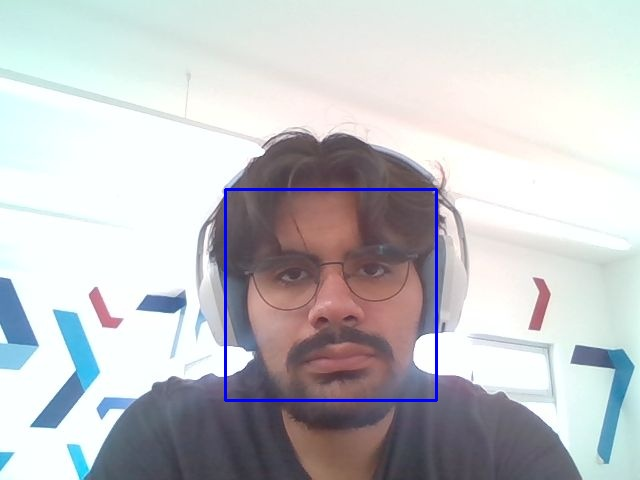

In [7]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# import cv2

# # Load the image
# image = cv2.imread('/content/photo.jpg')

# # Define the region of interest (ROI) coordinates
# x, y, width, height = 100, 100, 200, 200

# # Crop the image using array slicing
# cropped_image = image[y:y+height, x:x+width]

# # Display the cropped image
# cv2.imshow('Cropped Image', cropped_image)
# cv2.waitKey(0)

# # Save the cropped image
# cv2.imwrite('/cropped_image.jpg', cropped_image)

# # Close the windows
# cv2.destroyAllWindows()


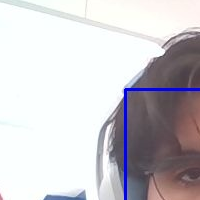

True

In [9]:
# from google.colab.patches import cv2_imshow
# import cv2

# # Load the image
# image = cv2.imread('/content/photo.jpg')

# # Define the region of interest (ROI) coordinates
# x, y, width, height = 100, 100, 200, 200

# # Crop the image using array slicing
# cropped_image = image[y:y+height, x:x+width]

# # Display the cropped image
# cv2_imshow(cropped_image)

# # Save the cropped image
# cv2.imwrite('/content/cropped_image.jpg', cropped_image)


In [ ]:
# import cv2
# face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))


# # Load the image
# image = cv2.imread('/content/photo.jpg')

# # Load the pre-trained face cascade classifier
# # face_cascade = cv2.CascadeClassifier('path/to/haarcascade_frontalface_default.xml')

# # Convert the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Detect faces in the grayscale image
# faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# # Iterate over the detected faces
# for (x, y, w, h) in faces:
#     # Choose the face that corresponds to your face
#     # Adjust the conditions based on the position and size of the face in the image
    
#     # Example conditions: choose the first face with width and height greater than a threshold
#     if w > 100 and h > 100:
#         # Define the region of interest (ROI) around the face
#         roi = image[y:y+h, x:x+w]
        
#         # Display the cropped face image
#         cv2.imshow('Cropped Face', roi)
        
#         # Save the cropped face image
#         cv2.imwrite('path/to/cropped_face.jpg', roi)
        
#         break

# # Wait for key press and then close the windows
# cv2.waitKey(0)
# cv2.destroyAllWindows()


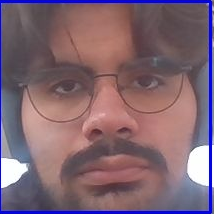

In [14]:
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

# Load the image
image = cv2.imread('/content/photo.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Iterate over the detected faces
for (x, y, w, h) in faces:
    # Choose the face that corresponds to your face
    # Adjust the conditions based on the position and size of the face in the image

    # Example conditions: choose the first face with width and height greater than a threshold
    if w > 100 and h > 100:
        # Define the region of interest (ROI) around the face
        roi = image[y:y+h, x:x+w]

        # Display the cropped face image
        cv2_imshow(roi)

        # Save the cropped face image
        cv2.imwrite('/content/cropped_face.jpg', roi)

        break


In [17]:
from tensorflow.keras.preprocessing import image
#img_path = '/content/drive/MyDrive/Escuela/ia/dataset/test/Membrácido-brasileño/Membrácido-brasileño20.jpeg'
img_path = '/content/cropped_face.jpg'

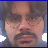

In [18]:
from tensorflow.keras.preprocessing import image

# Load the image using Keras
img = image.load_img(img_path, target_size=(48, 48))

# Display the image
img.show()

In [19]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('/content/drive/MyDrive/Escuela/ia/reconocer-jetas/modelos_propios/mi_modelo_cuarentav3.h5')
model.summary()


In [26]:
from tensorflow.keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)
preds = model.predict(X)

1/1 [==============================] - 4s 4s/step


In [27]:
preds.shape

(1, 6)

In [28]:
preds

array([[5.5926343e-08, 6.9434599e-17, 9.3571863e-08, 1.6193149e-13,
        9.1936298e-20, 9.9999988e-01]], dtype=float32)

In [54]:
emotion = {'Angry': 0, 'Fear': 1, 'Happy': 2, 'Sad': 3,
           'Surprise': 4, 'Neutral': 5}

In [31]:
print(preds.dtype)

float32


In [32]:
import numpy as np

# Check if variable is an array
if isinstance(preds, np.ndarray):
    print("Variable is an array")
else:
    print("Variable is not an array")

Variable is an array


In [33]:
def get_highest_value_position(array):
    # Get the index of the maximum value in the array
    max_index = np.argmax(array)
    
    # Convert the index to the corresponding position
    position = np.unravel_index(max_index, array.shape)
    
    return position

In [56]:
print(get_highest_value_position(preds))
alfa=get_highest_value_position(preds)

print(type(alfa))
print(type(emotion))
print(alfa[-1])
check = alfa[-1]

emotion_arr = []

(0, 5)
<class 'tuple'>
<class 'dict'>
5


In [57]:
for key, value in emotion.items():
    if value == check:
        print("The key associated with the value is:", key)
        emotion_arr.append(key)
        break

print(emotion_arr)

The key associated with the value is: Neutral
['Neutral']


In [6]:
# import cv2

# # Load Haar cascade for face detection
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# # Start the webcam feed
# cap = cv2.VideoCapture(0)

# while True:
#     # Read frame from the webcam
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert frame to grayscale for face detection
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect faces in the frame
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

#     # Draw rectangle and text for each detected face
#     for (x, y, w, h) in faces:
#         # Draw rectangle around the face
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
#         # Add text label above the face rectangle
#         text = 'Face'
#         cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

#     # Display the frame with annotations
#     cv2.imshow('Video', frame)

#     # Press 'q' to quit
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture and close the window
# cap.release()
# cv2.destroyAllWindows()
